In [ ]:
# Load model directly
import transformers 
import torch
model_id = "meta-llama/Llama-3.1-8B-Instruct"
pipeline = transformers.pipeline("text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto",return_full_text=False)

In [ ]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='en', target='ta')
translator.translate_batch(batch=["Hello, how are you?", "I am fine, thank you."], src="en", dest="ta")

In [ ]:
from datasets import load_from_disk
ds = load_from_disk("ta_tinystories_google_translate")
len( ds["train"])

In [ ]:
def translate_indices(ds, split, start_index, num_batches, batch_size=500, odir="chunks"):
    end_index = start_index + num_batches * batch_size
    translator = GoogleTranslator(source='en', target='ta')
    translated_sublist = []
    for i in range(start_index, end_index, batch_size):
        batch =  ds[split][i:i+batch_size]["text"]
        translated = translator.translate_batch(batch=batch)
        translated_sublist.extend([ {idx+start_index:item} for idx,item in enumerate(translated)])
    with open(f"{odir}/{split}_{start_index}_{end_index}.json", "w") as f:
        json.dump(translated_sublist, f)
    return translated_sublist

In [ ]:
from deep_translator import GoogleTranslator
ta_ls=translate_indices(ds_en,"train",0,4)

In [ ]:
import os
os.makedirs("chunks", exist_ok=True)

In [ ]:
import asyncio
from googletrans import Translator
async def translate_bulk(inputs):
    translator = Translator()
    loop = asyncio.get_running_loop()

    # Run translate() in an executor to avoid blocking
    translations = await loop.run_in_executor(None, translator.translate, inputs, 'ta')

    # Ensure translations is always a list
    if not isinstance(translations, list):
        translations = [translations]

    for translation in translations:
        print(translation.origin, ' -> ', translation.text)

In [ ]:
from datasets import load_dataset

from torch.utils.data import DataLoader
def collate_text(batch):
    return [item["text"] for item in batch]
ds_en = load_dataset("roneneldan/TinyStories")
dataloader = DataLoader(ds["train"], batch_size = 500, shuffle = False, collate_fn = collate_text)

In [ ]:
iter_loader =(iter(dataloader))

In [ ]:
iter_loader[0]

In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='en', target='ta')
translations = translator.translate_batch(batch)

In [ ]:
translations[0]

In [ ]:
inputs = [ds["train"][i]["text"] for i in range(1000)]
async def main():
    await translate_bulk(inputs)
asyncio.create_task(main())

In [ ]:
system_prompt = "You are a translator. I will tell you a story in words that a 4 year old can understand. You will translate it to Tamil for me"
message = ds["train"][-1]["text"]
final_input = [
    {"role": "assistant", "content": system_prompt},
    {"role": "user", "content": message}
]
print(final_input)

In [ ]:
from ollama import chat
from ollama import ChatResponse

response: ChatResponse = chat(model='gemma2', messages=final_input)
print(response['message']['content'])

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="abhinand/tamil-llama-7b-instruct-v0.2", device_map="auto")

In [ ]:

pipe(final_input)

In [ ]:
ஒருநாள், ஒரு சிறுமி சிலி (Lily) இன் அறையில் ஒரு துளையினை கண்டார். அவள் அது விளையாட முடியாது என்பதனாலும், அது கூரானதாக இருப்பதால் மட்டும் தெரிந்திருந்தது. சிலி அவளை தாய்விடம் பகிர்ந்து கொள்ள விரும்பினார், அ
அதனால் அவர் துணிகளில் ஒரு பட்டனை இணைக்கலாம். சிலி தாயாரிடம் சென்று "அம்மா, நான் ஒரு துளையினை கண்டேன். நீங்கள் எனது உடையில் ஒரு பட்டனை இணைக்க போதும்." என்று கூறினார். அம்மா சிரித்துப் பேசினார்: "ஆம் சிலி, ந
நாங்கள் துளையைப் பகிர்ந்து கொண்டு உன் உடையின் பட்டனை இணைக்கலாம்."

இருவரும் துளையினைப் பகிர்ந்து கொண்டு உடையில் பட்டனை இணைத்தார்கள். அது அவர்களுக்கு கடினமில்லை, ஏனென்றால் அவர்கள் ஒன்றுக்கொன்று உதவி செய்து கொண்டார்கள். முடிந்தவுடன் சிலி தாயாருக்கு துளையினைப் பகிர்ந்து கொ
கொடுத்தது மட்டுமல்லாமல், உடையின் பட்டனை இணைத்ததற்காகவும் நன்றி தெரிவித்தார். இருவரும் சேர்ந்து பணி செய்ததால் அந்த நிமிடம் மிகவும் மகிழ்ச்சியானதாக இருந்தது.


In [3]:
from transformers import GPTNeoForCausalLM, AutoTokenizer, GPTNeoConfig

tokenizer = AutoTokenizer.from_pretrained("abhinand/tamil-llama-7b-instruct-v0.2")


In [66]:
input_text = "அதனால்"

inputs = tokenizer(input_text, return_tensors="pt")
output = model.generate(**inputs, max_length=100, temperature=0.7, top_k=50, top_p=0.9)
print(tokenizer.decode(output[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


அதனால் 201 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 


In [50]:
test = "அதனால் அவர் துணிகளில் "
tokens = tokenizer.encode(test)
print(tokens)  # Check if there are unexpected token values
print(tokenizer.decode(tokens, skip_special_tokens=True)) 

[1, 33577, 32214, 41203, 32616, 29871, 2]
அதனால் அவர் துணிகளில் 


In [ ]:
from datasets import load_dataset, DatasetDict
dataset = load_dataset("uonlp/CulturaX", "ta")
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Loading dataset shards:   0%|          | 0/86 [00:00<?, ?it/s]

Map:   0%|          | 0/4728460 [00:00<?, ? examples/s]

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7bad441113d0>>
Traceback (most recent call last):
  File "/home/niranjan/miniconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [76]:
print(tokenized_datasets["train"][1])

{'text': "பிரிட்ஜ் பராமரிப்பு! | சிறுவர் மலர் | Siruvarmalar | tamil weekly supplements\n* பிரிட்ஜை அடுப்பு அறையில் வைக்க கூடாது. புகை பட்டு நிறம் போய்விடும்.\n* பிரிட்ஜை அடிக்கடி திறக்க கூடாது; திறந்தால் உடனே மூடி விட வேண்டும்.\n* பிரீசரில் உள்ள ஐஸ் தட்டுகள் எடுக்க வரவில்லை எனில் கத்தியை வைத்து குத்த கூடாது. அதற்கு பதில், பழைய காஸ்கட்டை போட்டு அதன்மேல் வைத்தாலோ அல்லது சிறிது கல் உப்பை தூவி வைத்து அதன் மேல் ஐஸ் தட்டை வைத்தாலோ சுலபமாக எடுக்க வரும்.\n* பிரிட்ஜில் வைக்கும் பொருள்களின் மீது நீர்த்துளிகள் கண்டிப்பாக படிந்து இருக்க கூடாது. நன்கு துடைத்து வைக்க வேண்டும்.\n* அதிகப்படியாக பொருள்களை அடைத்து வைக்க கூடாது. பெட்டிக்குள் வைக்கப்படும் ஒவ்வொரு பொருளுக்கும் காற்று செல்வதற்கு ஏற்ப சிறிது இடைவெளி விட்டு வைக்க வேண்டும்.\n* பிரிட்ஜை இதமாக திறந்து மூட வேண்டும்.\n* பிரிட்ஜ் முன் ரப்பர் உறையை விரித்து, அதன் மீது ஏறி நின்று, பிரிட்ஜை திறந்தால் ஷாக் அடிக்காது.\n* பச்சை காய்கறிகளை, 'பாலிதீன்' கவர்களில் போட்டு வைக்கவும்.\n* பிரிட்ஜில் வைக்கும் பாட்டில்களை, அடிக்கடி சுத்தம் செய்து வெயிலில் காய வைத

In [22]:
import transformers
model = transformers.AutoModelForCausalLM.from_pretrained("models/finetuned_gptneo-base-ts_2")
tokenizer = transformers.AutoTokenizer.from_pretrained("models/finetuned_gptneo-base-ts_2")
test = "முந்தைய நாளே காய்கறியை அரிந்து இறுக்கமாக பாலிதீன் "
inputs = tokenizer(test, return_tensors="pt")
output = model.generate(**inputs, max_length=128, num_return_sequences=1)
print(tokenizer.decode(output[-1], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


முந்தைய நாளே காய்கறியை அரிந்து இறுக்கமாக பாலிதீன் 
அண்ணன் படங்களிலேயே மிகவும் பிரசித்தி பெற்ற படலத்தை இந்த கதை மிகவும் பிடித்தது. அந்த கதையைப் பற்றி ஒரு முறை பெருமையாக நான் கேள்விப்பட்டிருக்கிறேன். வெயில், மழை, குளிர், குளிர் என அந்த காட்டில் மழையே பெய்ய்கிறது. குளிருக்கு இதமாக இருக்கும். மழையின்றி இந்த காட்டில் மழை. மழையின்றி இந்த காட்டில். கதையுடன் கதை அமைக்கப்பட்டுள்ளது. தன்னுடைய வீட்டில் ஒரு நாத்திகனாக இருந்தவனை அந்த கிழவி நினைத்து இருக்கிறாள். அவள் ஒரு நாள் மழைக் கிழவியை எதிர்பார்த்துக் கொண்டே இருந்தாள். அப்போது


In [50]:
from datasets import load_dataset
import transformers
# dataset = load_dataset("tniranjan/tinystories_ta_google_translate")
# model = transformers.AutoModelForCausalLM.from_pretrained("models/finetuned_gptneo-base-ts_2")
# tokenizer = transformers.AutoTokenizer.from_pretrained("models/finetuned_gptneo-base-ts_2")
# test = "முந்தைய நாளே காய்கறியை அரிந்து இறுக்கமாக பாலிதீன் "
# inputs = tokenizer(dataset["train"]["text"][0][:63], return_tensors="pt")
# output = model.generate(**inputs, max_length=128, num_return_sequences=1)
# print(tokenizer.decode(output[-1], skip_special_tokens=True), model.device)
print(f"Tokenizer max length: {tokenizer.model_max_length}") 

Tokenizer max length: 1000000000000000019884624838656


In [90]:
print("\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bcd \u0bb0\u0bbe\u0bae\u0bb0\u0bbf\u0baa\u0bcd\u0baa\u0bc1! | \u0b9a\u0bbf\u0bb1\u0bc1\u0bb5\u0bb0\u0bcd \u0bae\u0bb2\u0bb0\u0bcd | Siruvarmalar | tamil weekly supplements* \u0baa \u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bc8 \u0b85\u0b9f\u0bc1\u0baa\u0bcd\u0baa\u0bc1 \u0b85\u0bb1\u0bc8\u0baf\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1. \u0baa\u0bc1\u0b95\u0bc8 \u0baa\u0b9f\u0bcd\u0b9f\u0bc1 \u0ba8\u0bbf\u0bb1\u0bae\u0bcd \u0baa\u0bcb\u0baf\u0bcd\u0bb5\u0bbf\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bc8 \u0b85\u0b9f\u0bbf\u0b95\u0bcd\u0b95\u0b9f\u0bbf \u0ba4\u0bbf\u0bb1\u0b95\u0bcd\u0b95 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1; \u0ba4\u0bbf\u0bb1\u0ba8\u0bcd\u0ba4\u0bbe\u0bb2\u0bcd \u0b89\u0b9f\u0ba9\u0bc7 \u0bae\u0bc2\u0b9f\u0bbf \u0bb5\u0bbf\u0b9f \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bc0\u0b9a\u0bb0\u0bbf\u0bb2\u0bcd \u0b89\u0bb3\u0bcd\u0bb3 \u0b90\u0bb8\u0bcd \u0ba4\u0b9f\u0bcd\u0b9f\u0bc1\u0b95\u0bb3\u0bcd \u0b8e\u0b9f\u0bc1\u0b95\u0bcd\u0b95 \u0bb5\u0bb0\u0bb5\u0bbf\u0bb2\u0bcd\u0bb2\u0bc8 \u0b8e\u0ba9\u0bbf\u0bb2\u0bcd \u0b95\u0ba4\u0bcd\u0ba4\u0bbf\u0baf\u0bc8 \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0b95\u0bc1\u0ba4\u0bcd\u0ba4 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1. \u0b85\u0ba4\u0bb1\u0bcd\u0b95\u0bc1 \u0baa\u0ba4\u0bbf\u0bb2\u0bcd, \u0baa\u0bb4\u0bc8\u0baf \u0b95\u0bbe\u0bb8\u0bcd\u0b95\u0b9f\u0bcd\u0b9f\u0bc8 \u0baa\u0bcb\u0b9f\u0bcd\u0b9f\u0bc1 \u0b85\u0ba4\u0ba9\u0bcd\u0bae\u0bc7\u0bb2\u0bcd \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bbe\u0bb2\u0bcb \u0b85\u0bb2\u0bcd\u0bb2\u0ba4\u0bc1 \u0b9a\u0bbf\u0bb1\u0bbf\u0ba4\u0bc1 \u0b95\u0bb2\u0bcd \u0b89\u0baa\u0bcd\u0baa\u0bc8 \u0ba4\u0bc2\u0bb5\u0bbf \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0b85\u0ba4\u0ba9\u0bcd \u0bae\u0bc7\u0bb2\u0bcd \u0b90\u0bb8\u0bcd \u0ba4\u0b9f\u0bcd\u0b9f\u0bc8 \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bbe\u0bb2\u0bcb \u0b9a\u0bc1\u0bb2\u0baa\u0bae\u0bbe\u0b95 \u0b8e\u0b9f\u0bc1\u0b95\u0bcd\u0b95 \u0bb5\u0bb0\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bc1\u0bae\u0bcd \u0baa\u0bca\u0bb0\u0bc1\u0bb3\u0bcd\u0b95\u0bb3\u0bbf\u0ba9\u0bcd \u0bae\u0bc0\u0ba4\u0bc1 \u0ba8\u0bc0\u0bb0\u0bcd\u0ba4\u0bcd\u0ba4\u0bc1\u0bb3\u0bbf\u0b95\u0bb3\u0bcd \u0b95\u0ba3\u0bcd\u0b9f\u0bbf\u0baa\u0bcd\u0baa\u0bbe\u0b95 \u0baa\u0b9f\u0bbf\u0ba8\u0bcd\u0ba4\u0bc1 \u0b87\u0bb0\u0bc1\u0b95\u0bcd\u0b95 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1. \u0ba8\u0ba9\u0bcd\u0b95\u0bc1 \u0ba4\u0bc1\u0b9f\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0b85\u0ba4\u0bbf\u0b95\u0baa\u0bcd\u0baa\u0b9f\u0bbf\u0baf\u0bbe\u0b95 \u0baa\u0bca\u0bb0\u0bc1\u0bb3\u0bcd\u0b95\u0bb3\u0bc8 \u0b85\u0b9f\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1. \u0baa\u0bc6\u0b9f\u0bcd\u0b9f\u0bbf\u0b95\u0bcd\u0b95\u0bc1\u0bb3\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0baa\u0bcd\u0baa\u0b9f\u0bc1\u0bae\u0bcd \u0b92\u0bb5\u0bcd\u0bb5\u0bca\u0bb0\u0bc1 \u0baa\u0bca\u0bb0\u0bc1\u0bb3\u0bc1\u0b95\u0bcd\u0b95\u0bc1\u0bae\u0bcd \u0b95\u0bbe\u0bb1\u0bcd\u0bb1\u0bc1 \u0b9a\u0bc6\u0bb2\u0bcd\u0bb5\u0ba4\u0bb1\u0bcd\u0b95\u0bc1 \u0b8f\u0bb1\u0bcd\u0baa \u0b9a\u0bbf\u0bb1\u0bbf\u0ba4\u0bc1 \u0b87\u0b9f\u0bc8\u0bb5\u0bc6\u0bb3\u0bbf \u0bb5\u0bbf\u0b9f\u0bcd\u0b9f\u0bc1 \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bc8 \u0b87\u0ba4\u0bae\u0bbe\u0b95 \u0ba4\u0bbf\u0bb1\u0ba8\u0bcd\u0ba4\u0bc1 \u0bae\u0bc2\u0b9f \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bcd \u0bae\u0bc1\u0ba9\u0bcd \u0bb0\u0baa\u0bcd\u0baa\u0bb0\u0bcd \u0b89\u0bb1\u0bc8\u0baf\u0bc8 \u0bb5\u0bbf\u0bb0\u0bbf\u0ba4\u0bcd\u0ba4\u0bc1, \u0b85\u0ba4\u0ba9\u0bcd \u0bae\u0bc0\u0ba4\u0bc1 \u0b8f\u0bb1\u0bbf \u0ba8\u0bbf\u0ba9\u0bcd\u0bb1\u0bc1, \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bc8 \u0ba4\u0bbf\u0bb1\u0ba8\u0bcd\u0ba4\u0bbe\u0bb2\u0bcd \u0bb7\u0bbe\u0b95\u0bcd \u0b85\u0b9f\u0bbf\u0b95\u0bcd\u0b95\u0bbe\u0ba4\u0bc1.\n* \u0baa\u0b9a\u0bcd\u0b9a\u0bc8 \u0b95\u0bbe\u0baf\u0bcd\u0b95\u0bb1\u0bbf\u0b95\u0bb3\u0bc8, '\u0baa\u0bbe\u0bb2\u0bbf\u0ba4\u0bc0\u0ba9\u0bcd' \u0b95\u0bb5\u0bb0\u0bcd\u0b95\u0bb3\u0bbf\u0bb2\u0bcd \u0baa\u0bcb\u0b9f\u0bcd\u0b9f\u0bc1 \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bb5\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bc1\u0bae\u0bcd \u0baa\u0bbe\u0b9f\u0bcd\u0b9f\u0bbf\u0bb2\u0bcd\u0b95\u0bb3\u0bc8, \u0b85\u0b9f\u0bbf\u0b95\u0bcd\u0b95\u0b9f\u0bbf \u0b9a\u0bc1\u0ba4\u0bcd\u0ba4\u0bae\u0bcd \u0b9a\u0bc6\u0baf\u0bcd\u0ba4\u0bc1 \u0bb5\u0bc6\u0baf\u0bbf\u0bb2\u0bbf\u0bb2\u0bcd \u0b95\u0bbe\u0baf \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0b89\u0baa\u0baf\u0bcb\u0b95\u0baa\u0bcd\u0baa\u0b9f\u0bc1\u0ba4\u0bcd\u0ba4 \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0bb5\u0bbe\u0bb4\u0bc8\u0baa\u0bcd\u0baa\u0bb4\u0ba4\u0bcd\u0ba4\u0bc8 \u0b8e\u0b95\u0bcd\u0b95\u0bbe\u0bb0\u0ba3\u0bae\u0bcd \u0b95\u0bca\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0b95\u0bc2\u0b9f\u0bbe\u0ba4\u0bc1.\n* \u0baa\u0b9a\u0bcd\u0b9a\u0bc8\u0bae\u0bbf\u0bb3\u0b95\u0bbe\u0baf\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bc1\u0bae\u0bcd \u0baa\u0bcb\u0ba4\u0bc1, \u0b85\u0ba4\u0ba9\u0bcd \u0b95\u0bbe\u0bae\u0bcd\u0baa\u0bc8 \u0b8e\u0b9f\u0bc1\u0ba4\u0bcd\u0ba4\u0bc1 \u0bb5\u0bbf\u0b9f\u0bcd\u0b9f\u0bc1 \u0ba4\u0bbe\u0ba9\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0baa\u0bcd\u0baa\u0b9f\u0bc1\u0bae\u0bcd \u0b8e\u0ba8\u0bcd\u0ba4 \u0b89\u0ba3\u0bb5\u0bc1 \u0bb5\u0b95\u0bc8\u0baf\u0bbe\u0ba9\u0bbe\u0bb2\u0bc1\u0bae\u0bcd \u0bae\u0bc2\u0b9f\u0bbf \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bb5\u0bc1\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bbf\u0bb0\u0bc1\u0ba8\u0bcd\u0ba4\u0bc1 \u0ba4\u0bc1\u0bb0\u0bcd\u0ba8\u0bbe\u0bb1\u0bcd\u0bb1\u0bae\u0bcd \u0bb5\u0bc0\u0b9a\u0bbe\u0bae\u0bb2\u0bcd \u0b87\u0bb0\u0bc1\u0b95\u0bcd\u0b95, \u0b85\u0ba4\u0ba9\u0bc1\u0bb3\u0bcd \u0b8e\u0baa\u0bcd\u0baa\u0bcb\u0ba4\u0bc1\u0bae\u0bcd \u0b9a\u0bbf\u0bb1\u0bbf\u0ba4\u0bc1 \u0baa\u0bc1\u0ba4\u0bbf\u0ba9\u0bbe \u0b87\u0bb2\u0bc8\u0baf\u0bc8\u0baf\u0bcb, \u0b9a\u0bbe\u0bb1\u0bc1 \u0b8e\u0b9f\u0bc1\u0ba4\u0bcd\u0ba4 \u0b8e\u0bb2\u0bc1\u0bae\u0bbf\u0b9a\u0bcd\u0b9a\u0bae\u0bcd \u0baa\u0bb4 \u0bae\u0bc2\u0b9f\u0bbf\u0b95\u0bb3\u0bc8\u0baf\u0bcb \u0bb5\u0bc8\u0b95\u0bcd\u0b95\u0bb2\u0bbe\u0bae\u0bcd.\n* \u0ba4\u0baf\u0bbf\u0bb0\u0bc8 \u0b95\u0b9f\u0bc8\u0ba8\u0bcd\u0ba4\u0bc1 \u0b9a\u0bbf\u0bb1\u0bbf\u0ba4\u0bc1 \u0ba8\u0bc7\u0bb0\u0bae\u0bcd \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bbe\u0bb2\u0bcd, \u0b8e\u0bb3\u0bbf\u0ba4\u0bbe\u0b95 \u0bb5\u0bc6\u0ba3\u0bcd\u0ba3\u0bc6\u0baf\u0bcd \u0ba4\u0bbf\u0bb0\u0bb3\u0bc1\u0bae\u0bcd.\n* \u0bb5\u0bc6\u0b99\u0bcd\u0b95\u0bbe\u0baf\u0ba4\u0bcd\u0ba4\u0bc8 \u0baa\u0bbf\u0bb3\u0bbe\u0bb8\u0bcd\u0b9f\u0bbf\u0b95\u0bcd \u0b95\u0bb5\u0bb0\u0bbf\u0bb2\u0bcd \u0baa\u0bcb\u0b9f\u0bcd\u0b9f\u0bc1 \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0b87\u0bb0\u0ba3\u0bcd\u0b9f\u0bc1 \u0bae\u0ba3\u0bbf \u0ba8\u0bc7\u0bb0\u0bae\u0bcd \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0ba8\u0bb1\u0bc1\u0b95\u0bcd\u0b95\u0bbf\u0ba9\u0bbe\u0bb2\u0bcd \u0b95\u0ba3\u0bcd \u0b95\u0bb2\u0b99\u0bcd\u0b95\u0bbe\u0ba4\u0bc1.\n* \u0b89\u0bb0\u0bc1\u0bb3\u0bc8\u0b95\u0bcd\u0b95\u0bbf\u0bb4\u0b99\u0bcd\u0b95\u0bc1, \u0bb5\u0bc6\u0b99\u0bcd\u0b95\u0bbe\u0baf\u0bae\u0bcd, \u0baa\u0bc2\u0ba3\u0bcd\u0b9f\u0bc1 \u0bae\u0bc1\u0ba4\u0bb2\u0bbf\u0baf\u0bb5\u0bb1\u0bcd\u0bb1\u0bc8 \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0b95\u0bcd\u0b95 \u0bb5\u0bc7\u0ba3\u0bcd\u0b9f\u0bbe\u0bae\u0bcd.\n* \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1\u0bb3\u0bcd\u0bb3 \u0b95\u0bbe\u0baf\u0bcd\u0b95\u0bb1\u0bbf\u0b95\u0bb3\u0bc8, \u0b87\u0bb0\u0ba3\u0bcd\u0b9f\u0bc1 \u0bae\u0ba3\u0bbf \u0ba8\u0bc7\u0bb0\u0ba4\u0bcd\u0ba4\u0bbf\u0bb1\u0bcd\u0b95\u0bc1 \u0bae\u0bc1\u0ba9\u0bcd, \u0b8e\u0b9f\u0bc1\u0ba4\u0bcd\u0ba4\u0bc1 \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bc1 \u0b9a\u0bae\u0bc8\u0ba4\u0bcd\u0ba4\u0bbe\u0bb2\u0bcd \u0b8e\u0bb0\u0bbf\u0baa\u0bca\u0bb0\u0bc1\u0bb3\u0bcd \u0bae\u0bbf\u0b9a\u0bcd\u0b9a\u0bae\u0bbe\u0b95\u0bc1\u0bae\u0bcd.\n* \u0bae\u0bc1\u0ba8\u0bcd\u0ba4\u0bc8\u0baf \u0ba8\u0bbe\u0bb3\u0bc7 \u0b95\u0bbe\u0baf\u0bcd\u0b95\u0bb1\u0bbf\u0baf\u0bc8 \u0b85\u0bb0\u0bbf\u0ba8\u0bcd\u0ba4\u0bc1 \u0b87\u0bb1\u0bc1\u0b95\u0bcd\u0b95\u0bae\u0bbe\u0b95 \u0baa\u0bbe\u0bb2\u0bbf\u0ba4\u0bc0\u0ba9\u0bcd \u0b95\u0bb5\u0bb0\u0bbf\u0bb2\u0bcd \u0baa\u0bcb\u0b9f\u0bcd\u0b9f\u0bc1 \u0baa\u0bbf\u0bb0\u0bbf\u0b9f\u0bcd\u0b9c\u0bbf\u0bb2\u0bcd \u0bb5\u0bc8\u0ba4\u0bcd\u0ba4\u0bbe\u0bb2\u0bcd, \u0bb5\u0bc8\u0b9f\u0bcd\u0b9f\u0bae\u0bbf\u0ba9\u0bcd \u0b9a\u0ba4\u0bcd\u0ba4\u0bc1\u0b95\u0bcd\u0b95\u0bb3\u0bcd \u0b85\u0baa\u0bcd\u0baa\u0b9f\u0bbf\u0baf\u0bc7 \u0b87\u0bb0\u0bc1\u0b95\u0bcd\u0b95\u0bc1\u0bae\u0bcd.")

ிரிட்ஜ் ராமரிப்பு! | சிறுவர் மலர் | Siruvarmalar | tamil weekly supplements* ப ிரிட்ஜை அடுப்பு அறையில் வைக்க கூடாது. புகை பட்டு நிறம் போய்விடும்.
* பிரிட்ஜை அடிக்கடி திறக்க கூடாது; திறந்தால் உடனே மூடி விட வேண்டும்.
* பிரீசரில் உள்ள ஐஸ் தட்டுகள் எடுக்க வரவில்லை எனில் கத்தியை வைத்து குத்த கூடாது. அதற்கு பதில், பழைய காஸ்கட்டை போட்டு அதன்மேல் வைத்தாலோ அல்லது சிறிது கல் உப்பை தூவி வைத்து அதன் மேல் ஐஸ் தட்டை வைத்தாலோ சுலபமாக எடுக்க வரும்.
* பிரிட்ஜில் வைக்கும் பொருள்களின் மீது நீர்த்துளிகள் கண்டிப்பாக படிந்து இருக்க கூடாது. நன்கு துடைத்து வைக்க வேண்டும்.
* அதிகப்படியாக பொருள்களை அடைத்து வைக்க கூடாது. பெட்டிக்குள் வைக்கப்படும் ஒவ்வொரு பொருளுக்கும் காற்று செல்வதற்கு ஏற்ப சிறிது இடைவெளி விட்டு வைக்க வேண்டும்.
* பிரிட்ஜை இதமாக திறந்து மூட வேண்டும்.
* பிரிட்ஜ் முன் ரப்பர் உறையை விரித்து, அதன் மீது ஏறி நின்று, பிரிட்ஜை திறந்தால் ஷாக் அடிக்காது.
* பச்சை காய்கறிகளை, 'பாலிதீன்' கவர்களில் போட்டு வைக்கவும்.
* பிரிட்ஜில் வைக்கும் பாட்டில்களை, அடிக்கடி சுத்தம் செய்து வெயிலில் காய வைத்து உபயோகப்படுத்த வேண

In [56]:
eos_token_id = tokenizer.eos_token_id  # Should be 50256
eos_token = tokenizer.decode([eos_token_id])

print(f"EOS Token ID: {eos_token_id}")
print(f"EOS Token: {eos_token}")
print(tokenizer.special_tokens_map)


EOS Token ID: 2
EOS Token: </s>
{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}


In [3]:
tokenizer = AutoTokenizer.from_pretrained("abhinand/tamil-llama-7b-instruct-v0.2")
tokenizer.vocab_size

49992

In [24]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer

# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125m")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-neo-125m")
prompt = (
    "In a shocking finding, scientists discovered a herd of unicorns living in a remote, "
    "previously unexplored valley, in the Andes Mountains. Even more surprising to the "
    "researchers was the fact that the unicorns spoke perfect English."
)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [38]:
GPTNeoConfig(attention_types=[[['global', 'local'], 4]],num_layers=8)

GPTNeoConfig {
  "activation_function": "gelu_new",
  "attention_dropout": 0.0,
  "attention_layers": [
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local"
  ],
  "attention_types": [
    [
      [
        "global",
        "local"
      ],
      4
    ]
  ],
  "bos_token_id": 50256,
  "classifier_dropout": 0.1,
  "embed_dropout": 0.0,
  "eos_token_id": 50256,
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": null,
  "layer_norm_epsilon": 1e-05,
  "max_position_embeddings": 2048,
  "model_type": "gpt_neo",
  "num_heads": 16,
  "num_layers": 8,
  "resid_dropout": 0.0,
  "transformers_version": "4.48.3",
  "use_cache": true,
  "vocab_size": 50257,
  "window_size": 256
}

In [41]:
model =GPTNeoForCausalLM(GPTNeoConfig(attention_types=[[['global', 'local'], 4]],num_layers=8))
model.save_pretrained("dd")
mo = GPTNeoForCausalLM.from_pretrained("dd")

In [ ]:
from transformers import pipeline

pipe2 = pipeline("text-generation", model="roneneldan/TinyStories-8M")
print(pipe2("Once upon a time in a cave on top of a hill", max_new_tokens=400)[0]["generated_text"])

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe3 = pipeline("text-generation", model="roneneldan/TinyStories-33M")
print(pipe3("Once upon a time in a cave on top of a hill", max_new_tokens=400)[0]["generated_text"])

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="HuggingFaceTB/SmolLM2-135M", device_map="auto")
print(pipe("Once upon a time in a cave on top of a hill", max_new_tokens=400)[0]["generated_text"])


In [19]:
import matplotlib.pyplot as plt
import json
import math
perplexity_hq = json.load(open("perplexity.json"))
train_loss = json.load(open("gptNeo-ta_train_loss.json"))
eval_loss = json.load(open("gptNeo-ta_eval_loss.json"))

In [20]:
eval_loss_prunned = [{"iter":val[1], "perplexity":math.exp(val[2])} for val in eval_loss if ((val[1] == 1) or ((val[1] % 10000) == 0))]
train_loss_prunned = [{"iter":val[1], "perplexity":math.exp(val[2])} for val in train_loss if ((val[1] == 1) or ((val[1] % 10000) == 0))]

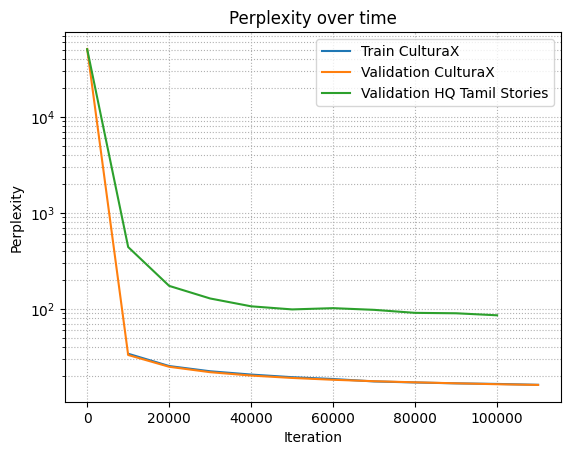

In [24]:
plt.plot([val["iter"] for val in train_loss_prunned], [val["perplexity"] for val in train_loss_prunned], label="Train CulturaX")
plt.plot([val["iter"] for val in eval_loss_prunned], [val["perplexity"] for val in eval_loss_prunned], label="Validation CulturaX")    
plt.plot([val["iter"] for val in perplexity_hq], [val["perplexity"] for val in perplexity_hq], label="Validation HQ Tamil Stories")
plt.xlabel("Iteration")
plt.ylabel("Perplexity")
plt.legend()
plt.yscale("log")
plt.grid(True, which="both", linestyle="dotted")
plt.title("Perplexity over time")
plt.show()  